## Analyse results from the sea level projections NetCDF files

In [43]:
import xarray as xr
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import importlib
sys.path.append('../code')
import func_misc as misc
sys.path.append('/Users/dewilebars/Projects/Project_SeaLevelBudgets/Notebooks/')
import SeaLevelContrib as slc

# statistics
import statsmodels.api as sm
import statsmodels.multivariate.pca
import statsmodels.tsa.seasonal

# displaying things
from ipywidgets import Image
import IPython.display

In [44]:
importlib.reload(slc)

<module 'SeaLevelContrib' from '/Users/dewilebars/Projects/Project_SeaLevelBudgets/Notebooks/SeaLevelContrib.py'>

In [45]:
AR5G85_ds = xr.open_dataset('../outputs/SeaLevelPDF_AR5_glo_rcp85.nc')
AR5G85_ds

<xarray.Dataset>
Dimensions:  (bin: 521, proc: 11, time: 95)
Coordinates:
  * time     (time) int64 2006 2007 2008 2009 2010 ... 2096 2097 2098 2099 2100
  * proc     (proc) object 'Global steric' 'Local ocean' ... 'sum anta.' 'Total'
  * bin      (bin) float64 -20.0 -19.0 -18.0 -17.0 ... 497.0 498.0 499.0 500.0
Data variables:
    MAT_RES  (time, proc, bin) float64 ...
Attributes:
    options:        Computations were done with the following options:: Local...
    source_file:    This NetCDF file was built from the Probabilistic Sea Lev...
    creation_date:  2020-02-10 11:46

In [46]:
Perc  = (1,5,10,17,20,50,80,83,90,95,99,99.5,99.9)
perc = misc.perc_df(AR5G85_ds.MAT_RES[-1,10,:], Perc, AR5G85_ds.bin)
perc

,values
percentiles,
1.0,46.0
5.0,53.0
10.0,57.0
17.0,61.0
20.0,63.0
50.0,74.0
80.0,85.0
83.0,87.0
90.0,92.0


In [47]:
AR5L85_ds = xr.open_dataset('../outputs/SeaLevelPDF_loc_rcp85.nc')
AR5L45_ds = xr.open_dataset('../outputs/SeaLevelPDF_loc_rcp45.nc')
AR5L45_ds

<xarray.Dataset>
Dimensions:      (bin: 5201, percentiles: 7, proc: 11, time: 95)
Coordinates:
  * time         (time) int64 2006 2007 2008 2009 2010 ... 2097 2098 2099 2100
  * proc         (proc) object 'Global steric' 'Local ocean' ... 'Total'
  * bin          (bin) float64 -20.0 -19.9 -19.8 -19.7 ... 499.8 499.9 500.0
  * percentiles  (percentiles) int64 1 5 17 50 83 95 99
Data variables:
    MAT_RES      (time, proc, bin) float64 ...
    Perc_ts      (time, proc, percentiles) float64 ...
Attributes:
    options:        Computations were done with the following options:: Local...
    source_file:    This NetCDF file was built from the Probabilistic Sea Lev...
    creation_date:  2020-02-25 09:14

In [48]:
# Plot nice tables of individual contributors
def table_contrib(ds, time):
    Perc  = (1,5,10,17,20,50,80,83,90,95,99,99.5,99.9)
    # Initialize dataframe
    df = pd.DataFrame(index=Perc, columns=ds.proc)
    for i in range(len(ds.proc)):
        perc = misc.perc_df(ds.MAT_RES[time,i,:], Perc, ds.bin)
        df[np.asscalar(ds.proc[i])] = perc['values']
    return df

In [49]:
table_contrib(AR5G85_ds, -1)

proc,Global steric,Local ocean,Inverse barometer,Glaciers,Greenland SMB,Antarctic SMB,Landwater,Antarctic dynamics,Greenland dynamics,sum anta.,Total
1.0,21.0,-20.0,-20.0,8.0,2.0,-13.0,-3.0,-2.0,-20.0,-11.0,46.0
5.0,24.0,-20.0,-20.0,11.0,3.0,-11.0,-1.0,-1.0,2.0,-8.0,53.0
10.0,26.0,-20.0,-20.0,12.0,4.0,-9.0,1.0,0.0,2.0,-6.0,57.0
17.0,27.0,-20.0,-20.0,13.0,5.0,-8.0,2.0,2.0,3.0,-4.0,61.0
20.0,28.0,-20.0,-20.0,14.0,6.0,-8.0,2.0,2.0,3.0,-3.0,63.0
50.0,31.0,-20.0,-20.0,17.0,9.0,-6.0,4.0,9.0,5.0,3.0,74.0
80.0,35.0,0.0,-20.0,21.0,14.0,-4.0,7.0,16.0,7.0,10.0,85.0
83.0,35.0,0.0,-20.0,22.0,15.0,-4.0,7.0,16.0,7.0,11.0,87.0
90.0,37.0,0.0,-20.0,23.0,18.0,-3.0,8.0,18.0,7.0,12.0,92.0
95.0,38.0,0.0,-20.0,25.0,21.0,-3.0,10.0,19.0,8.0,14.0,97.0


In [50]:
table_contrib(AR5L85_ds, -1)

proc,Global steric,Local ocean,Inverse barometer,Glaciers,Greenland SMB,Antarctic SMB,Landwater,Antarctic dynamics,Greenland dynamics,sum anta.,Total
1.0,15.0,-9.0,-20.0,6.5,0.5,-13.6,-1.5,0.4,-20.0,-8.2,43.0
5.0,19.4,-1.1,-20.0,8.3,0.7,-10.9,-0.1,2.3,0.5,-4.9,52.2
10.0,21.8,3.2,-20.0,9.4,0.9,-9.6,0.7,3.7,0.6,-3.1,57.1
17.0,23.9,7.0,-20.0,10.3,1.1,-8.5,1.4,5.1,0.7,-1.2,61.7
20.0,24.7,8.4,-20.0,10.6,1.2,-8.2,1.7,5.7,0.7,-0.6,63.3
50.0,30.2,18.3,-20.0,13.3,1.9,-5.9,3.5,11.4,1.1,5.5,75.8
80.0,35.7,28.3,-20.0,16.2,3.0,-4.0,5.3,20.6,1.6,14.8,89.7
83.0,36.4,29.6,-20.0,16.6,3.2,-3.8,5.5,22.2,1.6,16.4,91.7
90.0,38.6,33.5,-20.0,17.8,3.7,-3.2,6.2,27.5,1.7,21.7,98.0
95.0,40.9,37.8,-20.0,19.1,4.5,-2.5,7.0,34.7,1.8,28.9,105.7


In [51]:
AR5L85_ncl_ds = xr.open_dataset('/Users/dewilebars/Projects/Project_ProbSLR/SLP_v1.4/ExpTest/SeaLevelPDF_namelist_loc_rcp85.nc')
AR5G85_ncl_ds = xr.open_dataset('/Users/dewilebars/Projects/Project_ProbSLR/SLP_v1.4/ExpTest/SeaLevelPDF_namelist_AR5_glo_rcp85.nc')
AR5L85_ncl_ds

<xarray.Dataset>
Dimensions:       (bin: 521, period: 95, proc: 11)
Coordinates:
  * period        (period) int32 2006 2007 2008 2009 ... 2097 2098 2099 2100
  * bin           (bin) float64 -20.0 -19.0 -18.0 -17.0 ... 498.0 499.0 500.0
Dimensions without coordinates: proc
Data variables:
    DataPDF       (period, proc, bin) float64 ...
    ProcessNames  (proc) |S18 ...
Attributes:
    creation_date:  Mon Feb 10 16:11:39 CET 2020
    source_file:    This NetCDF file was built from the Probabilistic Sea  Le...
    title:          Computations were done with the following options:: Local...

In [52]:
# Plot tables of NCL code outputs -> Issues...
def table_contrib_ncl(ds, time, proc):
    Perc  = (1,5,10,17,20,50,80,83,90,95,99,99.5,99.9)
    # Initialize dataframe
    df = pd.DataFrame(index=Perc, columns=proc)
    for i in range(len(proc)):
        perc = misc.perc_df(ds.DataPDF[time,i,:], Perc, ds.bin)
        df[np.asscalar(proc[i])] = perc['values']
    return df
table_contrib_ncl(AR5L85_ncl_ds, -1, AR5L85_ds.proc)

proc,Global steric,Local ocean,Inverse barometer,Glaciers,Greenland SMB,Antarctic SMB,Landwater,Antarctic dynamics,Greenland dynamics,sum anta.,Total
1.0,5.0,-20.0,-20.0,2.0,-20.0,-20.0,-5.0,-20.0,-20.0,-18.0,19.0
5.0,8.0,-19.0,-20.0,3.0,-20.0,-18.0,-4.0,-20.0,-20.0,-16.0,25.0
10.0,9.0,-18.0,-20.0,4.0,-20.0,-17.0,-4.0,-20.0,-20.0,-15.0,28.0
17.0,10.0,-16.0,-20.0,4.0,-20.0,-17.0,-3.0,-20.0,-20.0,-14.0,30.0
20.0,10.0,-16.0,-20.0,4.0,-20.0,-16.0,-3.0,-20.0,-20.0,-14.0,30.0
50.0,12.0,-13.0,-20.0,5.0,-20.0,-15.0,-3.0,-20.0,-20.0,-12.0,34.0
80.0,13.0,-11.0,-20.0,6.0,-20.0,-14.0,-2.0,-20.0,-20.0,-12.0,37.0
83.0,13.0,-11.0,-20.0,6.0,-20.0,-14.0,-2.0,-20.0,-20.0,-12.0,37.0
90.0,14.0,-11.0,-20.0,6.0,-20.0,-14.0,-2.0,-2.0,-20.0,-11.0,37.0
95.0,14.0,-10.0,-20.0,6.0,-20.0,-14.0,-2.0,-2.0,-20.0,-11.0,38.0


In [53]:
table_contrib_ncl(AR5G85_ncl_ds, -1, AR5L85_ds.proc)

proc,Global steric,Local ocean,Inverse barometer,Glaciers,Greenland SMB,Antarctic SMB,Landwater,Antarctic dynamics,Greenland dynamics,sum anta.,Total
1.0,15.0,-20.0,-20.0,4.0,0.0,-19.0,-7.0,-20.0,-20.0,-17.0,32.0
5.0,17.0,-20.0,-20.0,5.0,0.0,-17.0,-6.0,-20.0,-20.0,-15.0,36.0
10.0,18.0,-20.0,-20.0,6.0,1.0,-16.0,-5.0,-20.0,-20.0,-14.0,38.0
17.0,19.0,-20.0,-20.0,6.0,1.0,-16.0,-5.0,-20.0,-20.0,-13.0,39.0
20.0,19.0,-20.0,-20.0,6.0,1.0,-15.0,-4.0,-20.0,-20.0,-13.0,40.0
50.0,20.0,-20.0,-20.0,7.0,1.0,-14.0,-3.0,-20.0,-20.0,-12.0,43.0
80.0,21.0,-20.0,-20.0,8.0,2.0,-13.0,-3.0,-2.0,-20.0,-11.0,45.0
83.0,21.0,-20.0,-20.0,8.0,2.0,-13.0,-3.0,-2.0,-20.0,-11.0,45.0
90.0,21.0,-20.0,-20.0,8.0,2.0,-13.0,-3.0,-2.0,-20.0,-11.0,45.0
95.0,21.0,-20.0,-20.0,8.0,2.0,-13.0,-3.0,-2.0,-20.0,-11.0,45.0


### Check the results of projections based on Bamber et al. 2019

In [127]:
B19L45_ds = xr.open_dataset('../outputs/SeaLevelPDF_B19_loc_rcp45.nc')
B19L45_ds

<xarray.Dataset>
Dimensions:      (bin: 5201, percentiles: 7, proc: 11, time: 95)
Coordinates:
  * time         (time) int64 2006 2007 2008 2009 2010 ... 2097 2098 2099 2100
  * proc         (proc) object 'Global steric' 'Local ocean' ... 'Total'
  * bin          (bin) float64 -20.0 -19.9 -19.8 -19.7 ... 499.8 499.9 500.0
  * percentiles  (percentiles) int64 1 5 17 50 83 95 99
Data variables:
    MAT_RES      (time, proc, bin) float64 ...
    Perc_ts      (time, proc, percentiles) float64 ...
Attributes:
    options:        Computations were done with the following options:: Local...
    source_file:    This NetCDF file was built from the Probabilistic Sea Lev...
    creation_date:  2020-03-10 16:47

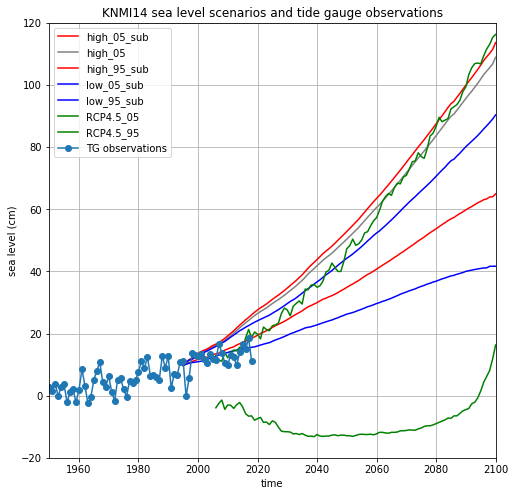

In [128]:
#Plot time series
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(KNMI14_df['high_05_sub'] + ref_KNMI14, 'r-', label='high_05_sub')
ax.plot(KNMI14_df['high_95'] + ref_KNMI14, 'grey', label='high_05')
ax.plot(KNMI14_df['high_95_sub'] + ref_KNMI14, 'r-', label='high_95_sub')
ax.plot(KNMI14_df['low_05_sub'] + ref_KNMI14, 'b-', label='low_05_sub')
ax.plot(KNMI14_df['low_95_sub'] + ref_KNMI14, 'b-', label='low_95_sub')
ax.plot(B19L45_ds.time, B19L45_ds.Perc_ts[:,-1,1], 'g', label='RCP4.5_05')
ax.plot(B19L45_ds.time, B19L45_ds.Perc_ts[:,-1,5], 'g', label='RCP4.5_95')
ax.plot(tg_df['Average'], 'o-', label='TG observations')

#ax.set_aspect(1)
ax.set_xlim([1950,2100])
ax.set_ylim([-20,120])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('KNMI14 sea level scenarios and tide gauge observations')
ax.grid(True)
plt.legend(loc='upper left')

#plt.savefig('ComparisonTG_KNMI14.pdf', dpi=150)

This shows that there is a problem in the Bamber et al. 2019 projections. It looks like it comes from West Antacrtica. This should be investigated further.